## Text Mining elon_musk data


## -Sentiment Analysis

In [202]:
!pip install spacy
!pip install wordcloud

In [203]:
###Execute below command through anaconda command prompt
!python -m spacy download en


[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## importing Libraries

In [204]:
import numpy as np # linear algebra4
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [205]:
import warnings
warnings.filterwarnings('ignore')

## Importing data_set

In [241]:
import pandas
elon=pd.read_csv("D:\\assignment\\text_mining\\Elon_musk.csv",encoding='latin-1')
elon.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [242]:
elon.drop(['Unnamed: 0'],inplace=True,axis=1)
elon.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


## visualisation of text data

In [243]:
import matplotlib.pyplot as plt

<AxesSubplot:>

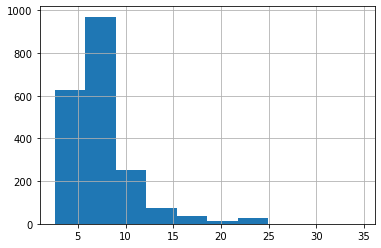

In [209]:
elon['Text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

## word count
### Number of Words in single text

In [244]:
elon['word_count'] = elon['Text'].apply(lambda x: len(str(x).split(" ")))
elon[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [245]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        1999 non-null   object
 1   word_count  1999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [246]:
elon.describe()

,word_count
count,1999.000000
mean,10.554777
std,6.693406
min,1.000000
25%,4.000000
50%,9.000000
75%,17.000000
max,30.000000


In [213]:
elon.isnull().sum()

Text          0
word_count    0
dtype: int64

## Cleaning the text by removing irrelevant information

In [247]:
text = elon.copy()

In [248]:
import re
import string

def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]','', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)     
    text = text.lower()
    return text

text['Text'] = text['Text'].apply(clean_text)
text

,Text,word_count
0,unalb11 im an alien,4
1,d_aa_carmack ray tracing on cyberpunk with hdr...,13
2,oerogan potify great interview!,4
3,tera27 doge is underestimated,4
4,eslacn congratulations tesla china for amazing...,17
...,...,...
1994,"lcnhvy true, it sounds so surreal, but the neg...",23
1995,pathole make sure to read ur terms &amp; condi...,12
1996,eslagong pathole samwise gamgee,4
1997,pathole altho dumb and dumber is <u+0001f525><...,7


## word frequency

In [216]:
## word frequency
freq=pd.Series(' '.join(elon['Text']).split()).value_counts()
freq

the                        405
to                         394
is                         353
a                          331
of                         307
                          ... 
https://t.co/K77wXQ11yt      1
dicey                        1
accurate,                    1
thinks                       1
28                           1
Length: 7062, dtype: int64

## Importing stopwords

In [217]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajpu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [218]:
sp = spacy.load('en_core_web_sm')

all_stopwords = sp.Defaults.stop_words

In [219]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajpu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [220]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [221]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajpu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## sorting stopwords

In [222]:
from nltk.corpus import stopwords
from textblob import TextBlob

In [223]:
stop = stopwords.words('english')

elon['stopwords'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
elon[['Text','stopwords']]

,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",11
1995,@PPathole Make sure to read ur terms &amp; con...,2
1996,@TeslaGong @PPathole Samwise Gamgee,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,2


##  Numbers of Special Characters

In [224]:
elon['hastags'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
elon[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


##  sorting lower case

In [225]:
elon['Text'] = elon['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
elon['Text'].head()


0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

 ## Removing Punctuation

In [226]:
elon['Text'] = elon['Text'].str.replace('[^\w\s]','')
elon['Text'].head()

0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

In [227]:
elon= [Text.strip() for Text in elon.Text] # remove both the leading and the trailing characters
elon = [Text for Text in elon if Text] # removes empty strings, because they are considered in Python as False
elon[0:10]

['kunalb11 im an alien',
 'id_aa_carmack ray tracing on cyberpunk with hdr is nextlevel have you tried it',
 'joerogan spotify great interview',
 'gtera27 doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year now on to the next for even more',
 'happy new year of the ox httpstco9wfkmyu2oj',
 'frodo was the underdoge all thought he would fail himself most of all httpstcozgxjfdzzrm',
 'owensparks_ flcnhvy anonyx10 haha thanks',
 'flcnhvy anonyx10 indeed tweets definitely do not represent realworld time allocation',
 'the most entertaining outcome is the most likely']

## Tokenization

In [228]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(elon))
sentences

['kunalb11 im an alien id_aa_carmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview gtera27 doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox httpstco9wfkmyu2oj frodo was the underdoge all thought he would fail himself most of all httpstcozgxjfdzzrm owensparks_ flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest httpstco3rwe9uhsts geoffkeighley unrealengine its getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u0001f923u0001f923 this is true power haha httpstcofc9uhqsd7o freewalletorg 

In [229]:
from nltk.tokenize import word_tokenize

tweets_tokenized = []

for tweet in elon:
  tokens = nltk.word_tokenize(tweet)
  for token in tokens:
    tweets_tokenized.append(token)

In [230]:
token_value=pd.DataFrame(tweets_tokenized)
token_value

,0
0,kunalb11
1,im
2,an
3,alien
4,id_aa_carmack
...,...
21055,u0001f525u0001f525
21056,progress
21057,update
21058,august


In [231]:
#Named Entity Recognition

import string
import spacy 
from spacy import displacy

NER = spacy.load("en_core_web_sm")

In [232]:
text=elon.copy()

In [233]:
rawtext=str(text)
rawtext

"['kunalb11 im an alien', 'id_aa_carmack ray tracing on cyberpunk with hdr is nextlevel have you tried it', 'joerogan spotify great interview', 'gtera27 doge is underestimated', 'teslacn congratulations tesla china for amazing execution last year now on to the next for even more', 'happy new year of the ox httpstco9wfkmyu2oj', 'frodo was the underdoge all thought he would fail himself most of all httpstcozgxjfdzzrm', 'owensparks_ flcnhvy anonyx10 haha thanks', 'flcnhvy anonyx10 indeed tweets definitely do not represent realworld time allocation', 'the most entertaining outcome is the most likely', 'givedirectly just sent some', 'just agree to do clubhouse with kanyewest', 'httpstco3rwe9uhsts', 'geoffkeighley unrealengine its getting real', 'bought some dogecoin for lil x so he can be a toddler hodler', 'joshmanmode he definitely has issues but the sentencing seems a bit high', 'freewalletorg thanks for fixing', 'freewalletorg please unlock my account', 'astrojordy u0001f923u0001f923', 

In [234]:
text1=NER(rawtext)

In [235]:
for word in text1.ents:
    print(word.text,word.label_)

kunalb11 ORG
joerogan PERSON
china GPE
last year DATE
new year DATE
anonyx10 ORG
anonyx10 ORG
nasa ORG
first ORDINAL
two CARDINAL
one CARDINAL
the next year DATE
100 CARDINAL
erdayastronaut PERSON
1 CARDINAL
2 CARDINAL
3 CARDINAL
tonight TIME
nivetha_7_42 PERSON
u0001f495 ORG
joshroomsburg ORG
two decades DATE
second ORDINAL
years' DATE
teslarati woodhaus2 PERSON
erdayastronaut josh_bickett ajtourville PERSON
erdayastronaut josh_bickett ajtourville PERSON
erdayastronaut josh_bickett ajtourville PERSON
erdayastronaut josh_bickett ajtourville PERSON
mu httpstcolbtg1sibuc' ORG
falcon 9 ORG
more than 300 million MONEY
un ORG
9 launches 60 CARDINAL
39a DATE
josh_bickett ajtourville PERSON
erdayastronaut PERSON
3 CARDINAL
erdayastronaut PERSON
erdayastronaut PERSON
erdayastronaut PERSON
3 CARDINAL
1 CARDINAL
falcon ORG
9 CARDINAL
60 CARDINAL
graffiti art' PERSON
u043cu044b u0441u0434u0435u043bu0430u0435u043c' PERSON
giga PERSON
berlin GPE
first ORDINAL
httpstcombesvnakad httpstcouklsjffrjk' 

In [236]:
spacy.explain("PERSON")

'People, including fictional'

In [237]:
print(spacy.explain("DATE"))
print(spacy.explain("ORG"))
print(spacy.explain("GPE"))

Absolute or relative dates or periods
Companies, agencies, institutions, etc.
Countries, cities, states


In [238]:
displacy.render(text1,style="ent",jupyter=True)

In [249]:
# Count vectorizer also tell us the frequency and occurences of word

from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(text['Text'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [250]:
print(word_freq_df.sort_values('occurrences',ascending = False).head())

     term  occurrences  frequency
4261  the          487   0.024311
4317   to          400   0.019968
2344   is          356   0.017772
3002   of          315   0.015725
2224   in          221   0.011032


In [251]:
# TFIDF - Term frequency inverse Document Frequency

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
doc_vec = vectorizer.fit_transform(text["Text"])

names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()

df = pd.DataFrame(denselist, columns = names_features)

In [252]:
df

,000,0001f1e9,0001f1ea,0001f339,0001f3b6,0001f440,0001f44c,0001f44d,0001f495,0001f4ab,...,yberpunkgame,yeah,year,years,yes,yesterday,yperchangetv,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.351703,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [253]:
# Bi-gram

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [254]:
Top2_words = get_top_n2_words(text["Text"], n=200)
Top2_df = pd.DataFrame(Top2_words)
Top2_df.columns=["Bi-gram", "Freq"]
Top2_df.head()

,Bi-gram,Freq
0,rt pacex,71
1,will be,51
2,of the,47
3,this is,36
4,in the,36


Text(0.5, 1.05, 'Top 30 2-words used')

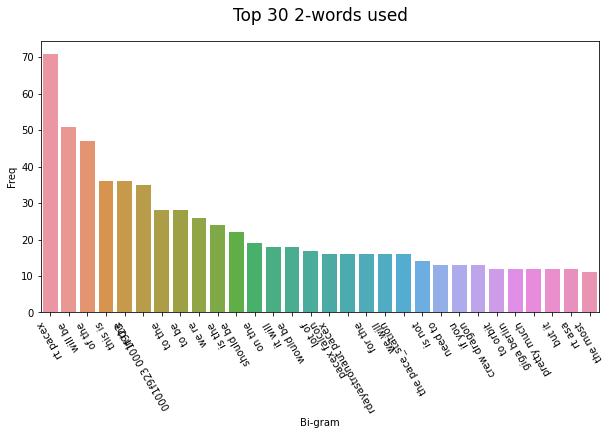

In [255]:
# Bi-gram plot

import matplotlib.pyplot as plt
import seaborn as sns

Top30_bigram = Top2_df.iloc[0:30,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=Top30_bigram["Bi-gram"],y=Top30_bigram["Freq"])
plot.set_xticklabels(rotation=120,labels = Top30_bigram["Bi-gram"])
plt.title("Top 30 2-words used", y=1.05, fontsize=17)

In [256]:
# Tri-gram

def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [257]:
Top3_words = get_top_n3_words(text["Text"], n=200)
Top3_df = pd.DataFrame(Top3_words)
Top3_df.columns=["Tri-gram", "Freq"]
Top3_df.head()

,Tri-gram,Freq
0,rt pacex falcon,16
1,falcon first stage,9
2,to the pace_station,9
3,it will be,8
4,pacex falcon first,8


Text(0.5, 1.05, 'Top 30 2-words used')

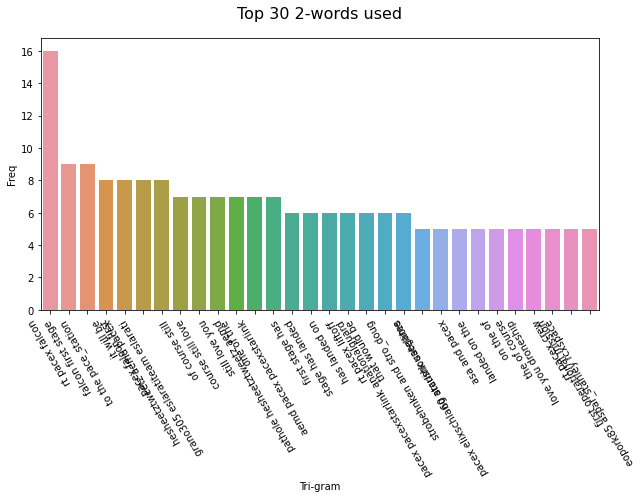

In [258]:
# Tri-gram plot

import matplotlib.pyplot as plt
import seaborn as sns

Top30_bigram = Top3_df.iloc[0:30,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=Top30_bigram["Tri-gram"],y=Top30_bigram["Freq"])
plot.set_xticklabels(rotation=120,labels = Top30_bigram["Tri-gram"])
plt.title("Top 30 2-words used", y=1.05, fontsize=16)

## Importing and installing TextBlob for processing Textual data

In [259]:
!pip install -U textblob

from textblob import TextBlob

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajpu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## sorting Subjectivity & polarity of words

In [260]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [261]:
text[["subjectivity","polarity"]] =text.apply(sentiment_analysis, axis=1)

text

,Text,word_count,subjectivity,polarity
0,unalb11 im an alien,4,0.750000,-0.250000
1,d_aa_carmack ray tracing on cyberpunk with hdr...,13,0.000000,0.000000
2,oerogan potify great interview!,4,0.750000,1.000000
3,tera27 doge is underestimated,4,0.000000,0.000000
4,eslacn congratulations tesla china for amazing...,17,0.366667,0.345313
...,...,...,...,...
1994,"lcnhvy true, it sounds so surreal, but the neg...",23,0.508333,0.111111
1995,pathole make sure to read ur terms &amp; condi...,12,0.888889,0.625000
1996,eslagong pathole samwise gamgee,4,0.000000,0.000000
1997,pathole altho dumb and dumber is <u+0001f525><...,7,0.500000,-0.375000


## Visualising WordCloud

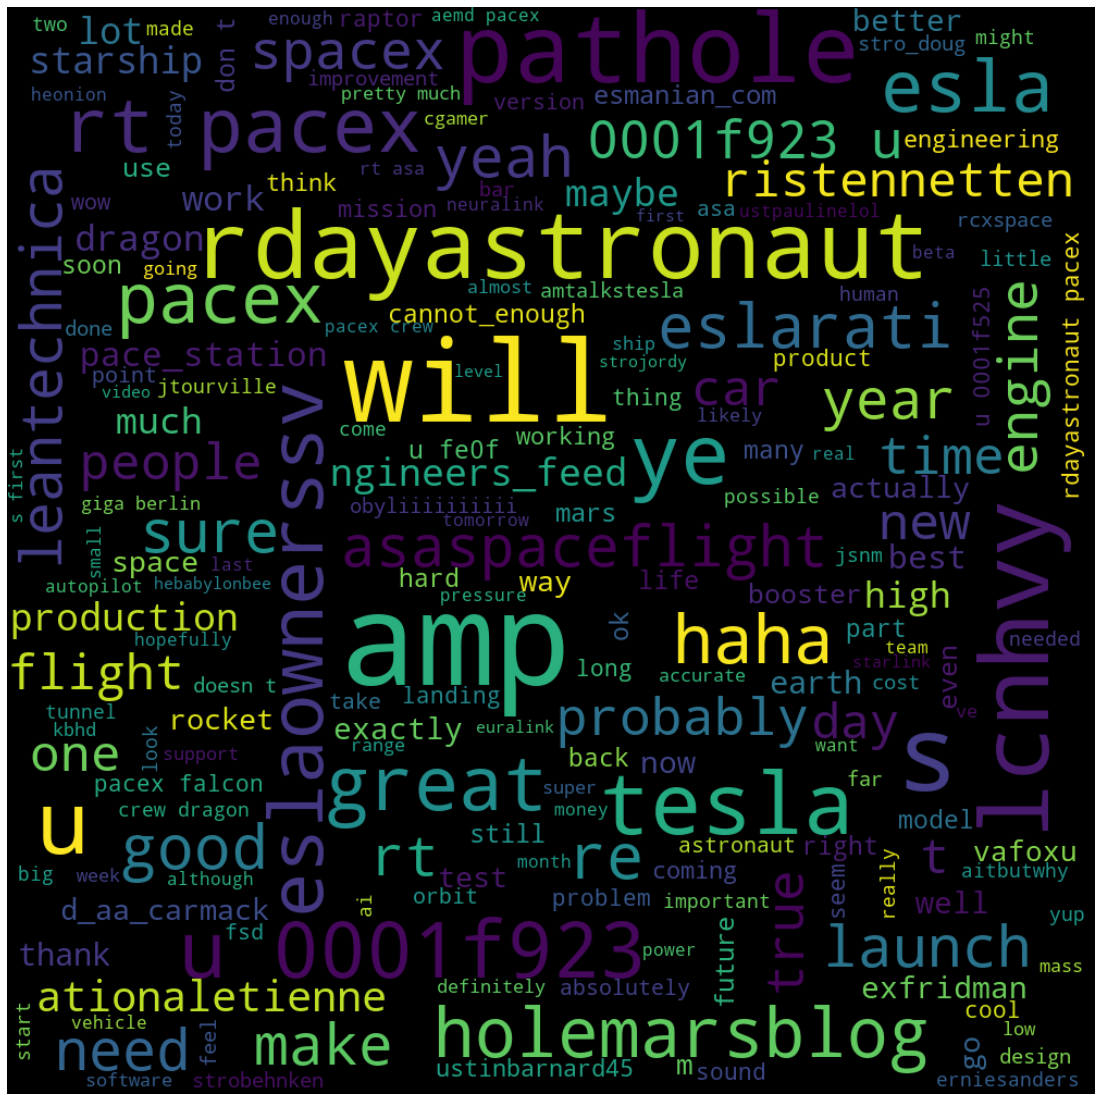

In [262]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in text["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

## sorting and analysing on the basis of word polarity

In [263]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
text["analysis"] = text["polarity"].apply(analysis)
# Print The Data
text

,Text,word_count,subjectivity,polarity,analysis
0,unalb11 im an alien,4,0.750000,-0.250000,Negative
1,d_aa_carmack ray tracing on cyberpunk with hdr...,13,0.000000,0.000000,Neutral
2,oerogan potify great interview!,4,0.750000,1.000000,Positive
3,tera27 doge is underestimated,4,0.000000,0.000000,Neutral
4,eslacn congratulations tesla china for amazing...,17,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,"lcnhvy true, it sounds so surreal, but the neg...",23,0.508333,0.111111,Positive
1995,pathole make sure to read ur terms &amp; condi...,12,0.888889,0.625000,Positive
1996,eslagong pathole samwise gamgee,4,0.000000,0.000000,Neutral
1997,pathole altho dumb and dumber is <u+0001f525><...,7,0.500000,-0.375000,Negative


## Extracting Positive and Negative tweets on the basis of Text behaviour

In [264]:
positive_tweets = text[text['analysis'] == 'Positive']
negative_tweets = text[text['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])

positive tweets
 -oerogan potify great interview!
 -eslacn congratulations tesla china for amazing execution last year. now on to the next for even more!!
 -happy new year of the ox! 
 -wensparks_ lcnhvy nonyx10 haha thanks :)
 -the most entertaining outcome is the most likely
negative tweets
 -unalb11 im an alien
 -reewalletorg your app sucks
 -ationaletienne damklotz_ starlink is a staggeringly difficult technical &amp; economic endeavor. however, if we don 
 -ationaletienne damklotz_ spacex needs to pass through a deep chasm of negative cash flow over the next year or 
 -ruhle everyone at tesla receives stock. 

my comp is all stock/options, which i do not take off the table. 

thats what youre missing.


## Visualising on the basis of Text Polarity & Subjectivity

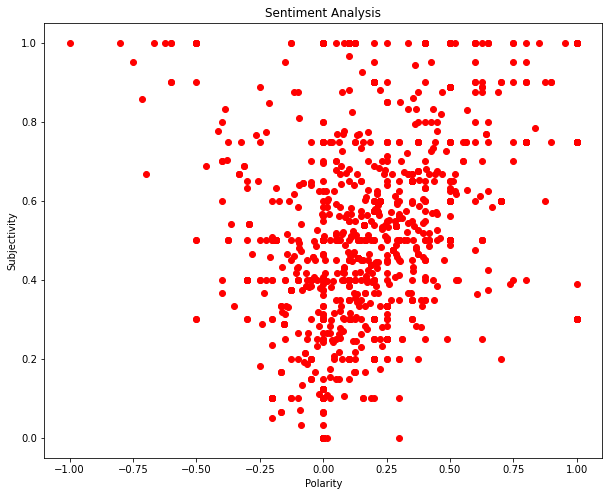

In [265]:
plt.figure(figsize=(10, 8))

for i in range(0, text.shape[0]):
    plt.scatter(text["polarity"][i], text["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

## since the dots on the positive side are more, thus hereby declaring that elon_musk data have more positive concern on the basis of text of tweets.